to generate the simulation data, run morpheus with the provided model.xml file, modify the number of B cells property according to the desired values.

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection


font_size = 20

x =  [1   ,2   ,3   ,   4,   6,   7,   8,9   ,20  ,26]
for i in x:
    folder_path = f'morpheus_{i}'
    csv_file = os.path.join(folder_path, 'logger.csv')
    
    # Skip if the folder or CSV file does not exist
    if not os.path.exists(folder_path) or not os.path.exists(csv_file):
        continue

    # Load the CSV file
    data = pd.read_csv(csv_file, delimiter='\t')
    data = data[data['cell.type'] == 2]

    # Extract x, y coordinates and calculate mean per time point
    num_cells = len(data[data['time'] == 0.1])
    grouped_data = data.groupby('time').mean().reset_index()
    x = grouped_data['cell.center.x'].values
    y = grouped_data['cell.center.y'].values

    x = x-x[0]
    y = y-y[0]

    # Calculate speed
    speed = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
    mean_speed = np.mean(speed)
    std_speed = np.std(speed)

    # Create line segments from the x, y coordinates
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a colormap that changes from gray to green
    cmap = mcolors.LinearSegmentedColormap.from_list("gray_to_green", ["gray", "gray"])
    norm = plt.Normalize(0, len(x))

    # Create a LineCollection from the segments
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(np.linspace(0, len(x), len(x)))
    lc.set_linewidth(2)

    # Plot the trajectory
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 20))
    ax1.add_collection(lc)
    ax1.plot(x, y, 'o', markersize=4, color='black', alpha=0.6)  # Plot x, y points
    ax1.set_xlim(x.min() - 1, x.max() + 1)
    ax1.set_ylim(y.min() - 1, y.max() + 1)
    ax1.set_aspect('equal')  # Ensure the x and y axes have the same scale
    ax1.set_xlabel('x', fontsize=font_size)
    ax1.set_ylabel('y', fontsize=font_size)
    ax1.tick_params(axis='both', which='major', labelsize=font_size)  # Increase tick sizes

    print(f'num cells: {num_cells}, mean speed: {mean_speed:.2f}, std speed: {std_speed:.2f}')

    plt.tight_layout()
    plt.savefig(f'trajectory_plot_{num_cells}_cells.png')
    plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# manually extract the data from the plots above and fill in the x, y_mean, and y_std lists

x =      [1   ,2   ,3   ,   4,   6,   7,   8,9   ,20  ,26]
y_mean = [2.24,1.78,1.51,1.35,1.12,1.08,1.05,0.97,0.69,0.65]
y_std =  [1.14,0.98,0.82,0.68,0.6 ,0.57,0.59,0.48,0.4 ,0.35]


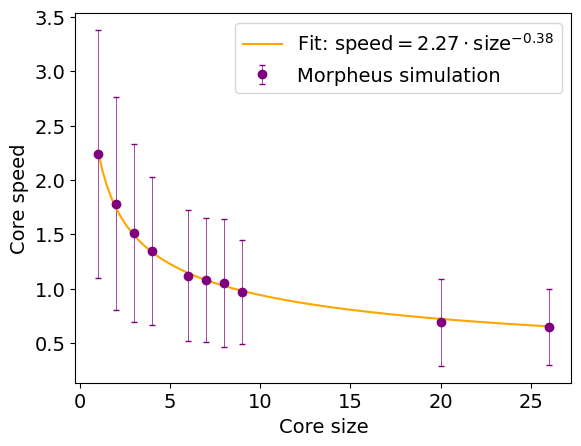

In [4]:
from scipy.optimize import curve_fit


def power_func(x, a, b):
    return a * np.power(x, b)

# Fit the power curve
params_power, _ = curve_fit(power_func, x, y_mean)

# Get the fit values
x_full = np.linspace(1,26,100)
y_fit_power = power_func(x_full, *params_power)
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define font size parameter
font_size = 14

# Plot data and power fit with error bars
plt.errorbar(x, y_mean, yerr=y_std, fmt='o', color='purple', ecolor='purple', elinewidth=0.5, capsize=2, label='Morpheus simulation')
plt.plot(x_full, y_fit_power, color='orange', label=r'Fit: $ \mathrm{speed} = %.2f \cdot \mathrm{size}^{%.2f}$' % (params_power[0], params_power[1]))

# Add labels and legend
plt.xlabel('Core size', fontsize=font_size)
plt.ylabel('Core speed', fontsize=font_size)
plt.legend(fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()